In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


In [3]:
from common import config
config.GPU=True
from common.np import *
from model.auto_encoder_conv import *
from common.optimizer import *
from common.trainer import Trainer
from dataset.mnist import load_mnist
from common.util import to_cpu,to_gpu

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True)

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)

x_train=x_train.reshape(x_train.shape[0],1,28,28)
t_train=x_train.reshape(x_train.shape[0],-1)

input_shape=(1,28,28)
conv_param_enc=[[16,3,1,1],[16,3,1,1],[32,3,1,1],[32,3,1,1],[64,3,1,1],[64,3,1,1]]
generate_size=2
hidden_list_dec=[256,512]
output_size=784
generate_activation='sigmoid'
activation='relu'
use_batchnorm=False
show_distribution=False

lr=0.001

max_epoch=20
batch_size=10
clip_grads=None
eval_interval=100

args_model=(input_shape,conv_param_enc,generate_size,hidden_list_dec,output_size,generate_activation,activation,use_batchnorm,show_distribution)
args_trainer=(x_train,t_train,max_epoch,batch_size,clip_grads,eval_interval)

model=ConvAE(*args_model)
optimizer=Adam(lr)
trainer=Trainer(model,optimizer)

trainer.fit(*args_trainer)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

| epoch 1 |  iter 1 / 6000 | time 13[s] | loss 133.75
| epoch 1 |  iter 101 / 6000 | time 15[s] | loss 33.60
| epoch 1 |  iter 201 / 6000 | time 18[s] | loss 30.97


KeyboardInterrupt: ignored

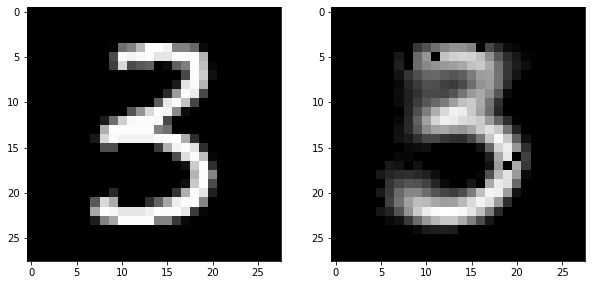

In [ ]:
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True)
x_test=x_test.reshape(x_test.shape[0],1,28,28)
model.show_predict(x_test)

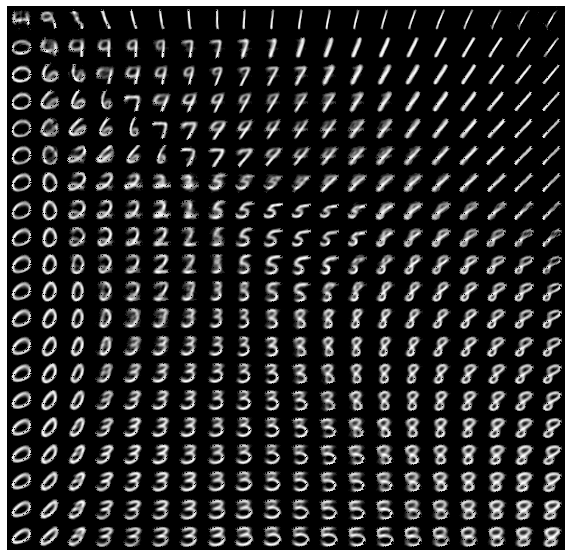

In [ ]:
model.show_generate(0,1,0.05)

In [ ]:
model.save_params(ROOT_PATH+'pkl/'+str(trainer.loss_list[-1])+'_ConvAE_N'+str(batch_size)+str(args_model)+'_'+str(optimizer.__class__.__name__)+str(lr)+'.pkl')